**Nama: Putri Adinda** <br>
**NIM: 211351112** <br>
**Kelas: Pagi B**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [4]:
df = pd.read_csv('survey lung cancer.csv')
df.shape

(309, 16)

In [5]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [7]:
df = df.drop(['GENDER'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   AGE                    309 non-null    int64 
 1   SMOKING                309 non-null    int64 
 2   YELLOW_FINGERS         309 non-null    int64 
 3   ANXIETY                309 non-null    int64 
 4   PEER_PRESSURE          309 non-null    int64 
 5   CHRONIC DISEASE        309 non-null    int64 
 6   FATIGUE                309 non-null    int64 
 7   ALLERGY                309 non-null    int64 
 8   WHEEZING               309 non-null    int64 
 9   ALCOHOL CONSUMING      309 non-null    int64 
 10  COUGHING               309 non-null    int64 
 11  SHORTNESS OF BREATH    309 non-null    int64 
 12  SWALLOWING DIFFICULTY  309 non-null    int64 
 13  CHEST PAIN             309 non-null    int64 
 14  LUNG_CANCER            309 non-null    object
dtypes: int64(14), object(1)

In [8]:
df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


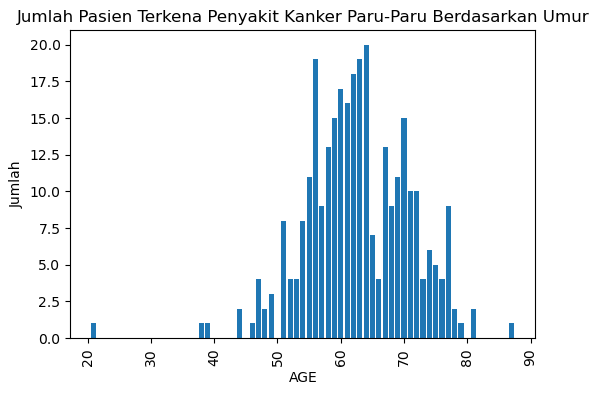

In [9]:
vis1 = df.groupby(['AGE']).count().reset_index()
vis1.sort_values('SMOKING', ascending=True, inplace=True)
fig = plt.figure(figsize=(6,4))
ax = plt.axes()
plt.ylabel('Jumlah')
plt.xlabel('AGE')
plt.title('Jumlah Pasien Terkena Penyakit Kanker Paru-Paru Berdasarkan Umur')
ax.bar(vis1['AGE'],vis1['SMOKING'])
plt.xticks(rotation=90)
plt.show()

<Axes: >

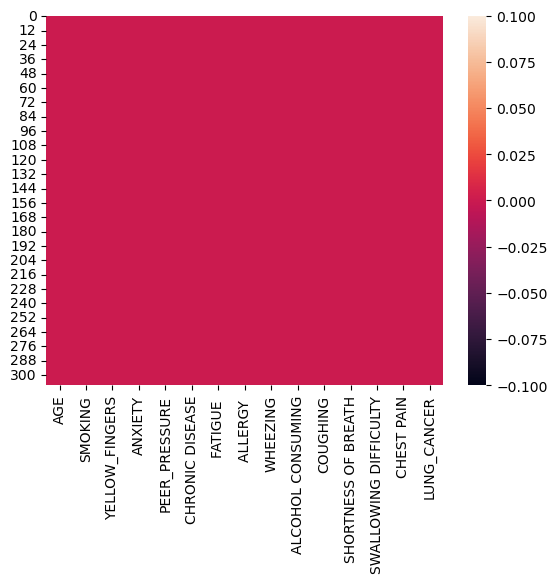

In [10]:
sns.heatmap(df.isnull())

C:\Users\putri\AppData\Local\Temp\ipykernel_848\3629252972.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

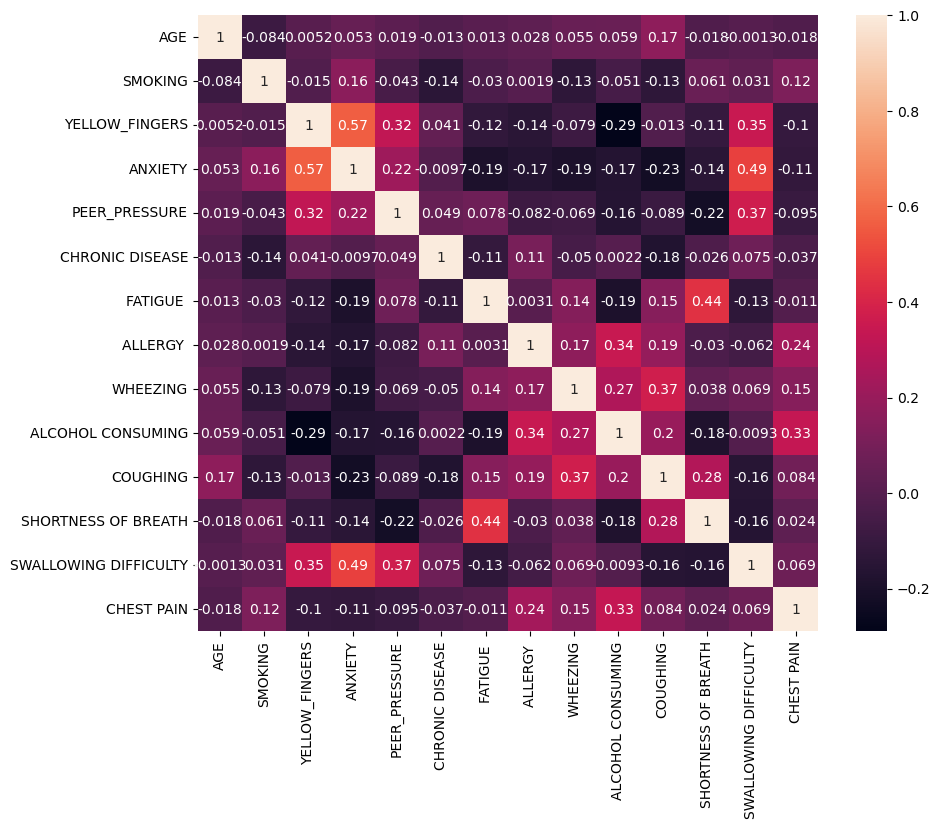

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

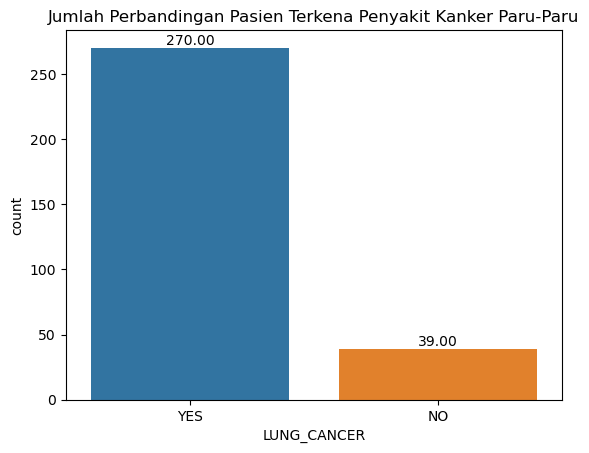

In [12]:
splot = sns.countplot(x = 'LUNG_CANCER', data = df)
plt.title('Jumlah Perbandingan Pasien Terkena Penyakit Kanker Paru-Paru')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

In [13]:
features = ['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']
x = df[features]
y = df['LUNG_CANCER']
x.shape, y.shape

((309, 12), (309,))

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=90)
y_test.shape

(78,)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier(n_neighbors=7)
model1.fit(x_train, y_train)
y_pred1=model1.predict(x_test)

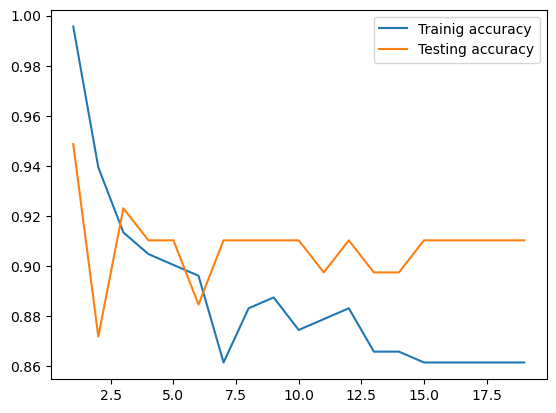

In [16]:
training_accuracy = []
testing_accuracy = []
for i in range(1,20):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(x_train,y_train)
  training_accuracy.append(knn.score(x_train,y_train))
  testing_accuracy.append(knn.score(x_test,y_test))

num = [i for i in range(1,20)]
plt.plot(num,training_accuracy,label = 'Trainig accuracy')
plt.plot(num,testing_accuracy,label = 'Testing accuracy')
plt.legend()
plt.show()

In [17]:
y_pred = model1.predict(x_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Akurasii model KNN:", accuray)
print("F1 Score:", f1)

Akurasii model KNN: 0.9102564102564102
F1 Score: 0.9336589336589336


In [18]:
input_data = np.array([[75,1,2,1,1,2,2,1,2,2,1,1]])

prediction = model1.predict(input_data)
print('Apakah Pasien Terkena Penyakit Kanker Paru-Paru? :', prediction)

Apakah Pasien Terkena Penyakit Kanker Paru-Paru? : ['YES']


c:\Users\putri\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


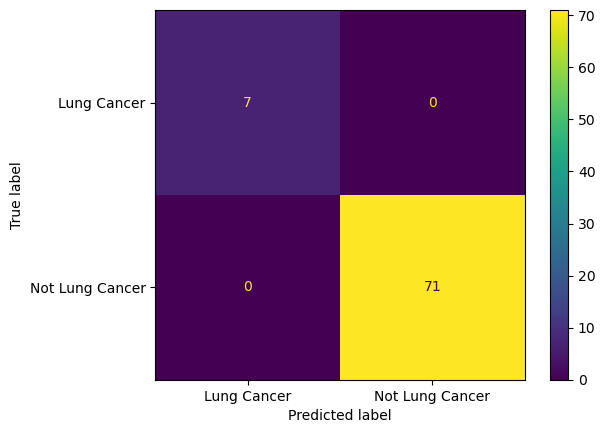

In [19]:
labels = ["Lung Cancer", "Not Lung Cancer"]
cm = confusion_matrix(y_test, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [20]:
from sklearn.model_selection import GridSearchCV
parameters={'n_neighbors':np.arange(1,50)}
model=KNeighborsClassifier()
grid_cv=GridSearchCV(model,parameters,cv=4)
grid_cv.fit(x,y)
print("Best Score:" + str(grid_cv.best_score_))
print("Best Parameters: " + str(grid_cv.best_params_))

Best Score:0.8867382617382618
Best Parameters: {'n_neighbors': 3}


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          NO       0.50      0.14      0.22         7
         YES       0.92      0.99      0.95        71

    accuracy                           0.91        78
   macro avg       0.71      0.56      0.59        78
weighted avg       0.88      0.91      0.89        78



In [22]:
import pickle

filename = 'estimasi_paru-paru.sav'
pickle.dump(knn, open(filename, 'wb'))